In [3]:
import pandas as pd
import numpy as np

file_name = "Lab Session Data.xlsx"
xls = pd.ExcelFile(file_name)


df_irctc = pd.read_excel(xls, sheet_name="IRCTC Stock Price")

df_irctc["Price"] = pd.to_numeric(df_irctc["Price"], errors="coerce")

median_price = df_irctc["Price"].median()


low_price_class = df_irctc[df_irctc["Price"] <= median_price]
high_price_class = df_irctc[df_irctc["Price"] > median_price]


numerical_features = ["Price", "Open", "High", "Low"]

centroid_low = low_price_class[numerical_features].mean().values
centroid_high = high_price_class[numerical_features].mean().values
spread_low = low_price_class[numerical_features].std().values
spread_high = high_price_class[numerical_features].std().values
euclidean_distance = np.linalg.norm(centroid_low - centroid_high)

print("Centroid (Mean) - Low Price Class:", centroid_low)
print("Spread (Std Dev) - Low Price Class:", spread_low)
print("Centroid (Mean) - High Price Class:", centroid_high)
print("Spread (Std Dev) - High Price Class:", spread_high)
print("Euclidean Distance Between Centroids:", euclidean_distance)


Centroid (Mean) - Low Price Class: [1366.1328 1369.7848 1384.8444 1353.804 ]
Spread (Std Dev) - Low Price Class: [31.76455033 35.37982739 37.99237361 29.88299873]
Centroid (Mean) - High Price Class: [1756.76290323 1753.68790323 1789.03991935 1725.17298387]
Spread (Std Dev) - High Price Class: [200.44302739 206.88774846 204.29805064 199.34048184]
Euclidean Distance Between Centroids: 775.4111233793925


A2

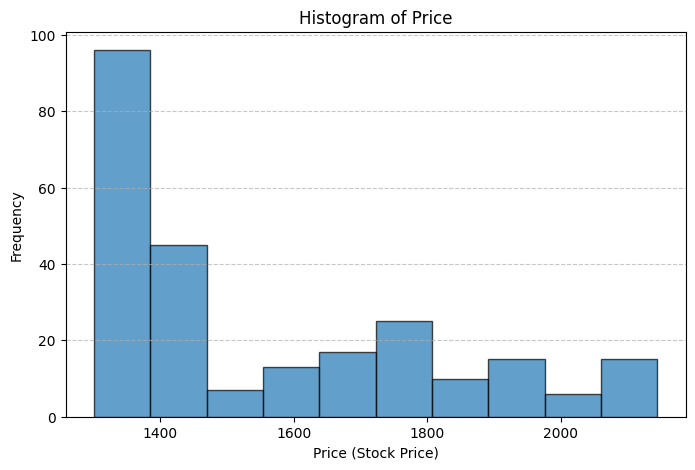

(1560.6634538152612, 58496.49239931618)

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_name = "Lab Session Data.xlsx"
xls = pd.ExcelFile(file_name)


df_irctc = pd.read_excel(xls, sheet_name="IRCTC Stock Price")


feature = "Price"


feature_data = df_irctc[feature].dropna()


hist_values, bin_edges = np.histogram(feature_data, bins=10)


mean_value = np.mean(feature_data)
variance_value = np.var(feature_data)


plt.figure(figsize=(8, 5))
plt.hist(feature_data, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel(f'{feature} (Stock Price)')
plt.ylabel('Frequency')
plt.title(f'Histogram of {feature}')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


mean_value, variance_value


A3

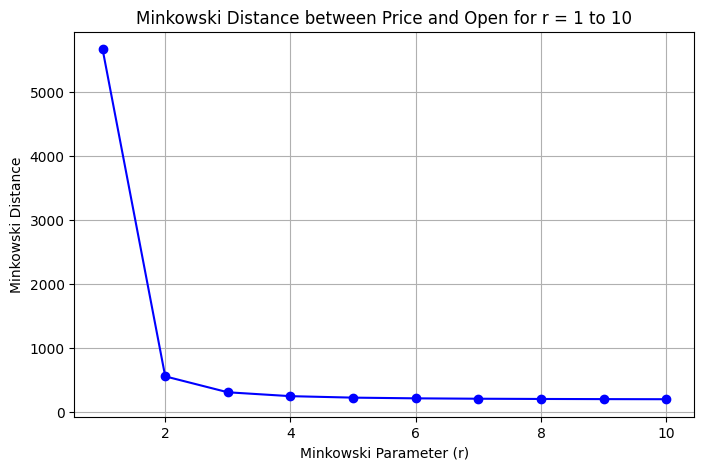

[(1, 5662.299999999999),
 (2, 550.3919694181593),
 (3, 301.50819390983594),
 (4, 240.94947430020423),
 (5, 217.87872469290787),
 (6, 206.86816777852732),
 (7, 200.80001504956726),
 (8, 197.1113853324539),
 (9, 194.71282145384123),
 (10, 193.07861433131603)]

In [5]:
from scipy.spatial.distance import minkowski
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_name = "Lab Session Data.xlsx"
xls = pd.ExcelFile(file_name)


df_irctc = pd.read_excel(xls, sheet_name="IRCTC Stock Price")

feature1 = "Price"
feature2 = "Open"


vec1 = df_irctc[feature1].dropna().values
vec2 = df_irctc[feature2].dropna().values


min_length = min(len(vec1), len(vec2))
vec1, vec2 = vec1[:min_length], vec2[:min_length]

r_values = range(1, 11)
minkowski_distances = [minkowski(vec1, vec2, r) for r in r_values]

plt.figure(figsize=(8, 5))
plt.plot(r_values, minkowski_distances, marker='o', linestyle='-', color='b')
plt.xlabel("Minkowski Parameter (r)")
plt.ylabel("Minkowski Distance")
plt.title(f"Minkowski Distance between {feature1} and {feature2} for r = 1 to 10")
plt.grid(True)
plt.show()


list(zip(r_values, minkowski_distances))
